In [9]:
# 2.1 Import Required Libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pathlib
from tensorflow.keras import layers
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.utils import image_dataset_from_directory

1. **Training Folder (train)**
    - **Purpose:** Helps the model learn patterns from the data.
    - **How It’s Used:**
      - The model looks at these images multiple times to learn how to classify them.
      - This is the largest dataset.

2. **Validation Folder (validation)**
    - **Purpose:** Checks how well the model is learning during training.
    - **How It’s Used:**
      - The model’s performance is tested on these images after each learning cycle (epoch).
      - These images don’t update the model—they just provide feedback.
      - Helps to detect overfitting.

3. **Test Folder (test)**
    - **Purpose:** Evaluates the model’s final performance after training.
    - **How It’s Used:**
      - The model looks at these images only after training is done.
      - Used to check how well the model works on completely unseen data.

In [3]:
data_folder = pathlib.Path('../Vanilla CNN and Fine-Tune VGG16 - for Dogs and Cats Classification/data/kaggle_dogs_vs_cats_small')

train_dataset = image_dataset_from_directory(
    data_folder / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    data_folder / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    data_folder / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


- The training dataset (data_folder/train) contains 2000 images.
    - These images are divided into 2 classes (likely "dogs" and "cats" based on the dataset name).
    - Found 1000 files belonging to 2 classes.

- The validation dataset (data_folder/validation) contains 1000 images.
    - Like the training set, the images belong to 2 classes.
    - Found 2000 files belonging to 2 classes.

- The test dataset (data_folder/test) contains 2000 images.
    - These images also belong to the same 2 classes.

In [4]:
type(train_dataset)

tensorflow.python.data.ops.batch_op._BatchDataset

Displaying the shapes of the data and labels yielded by the `Dataset`:

In [5]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [6]:
labels_batch

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0])>

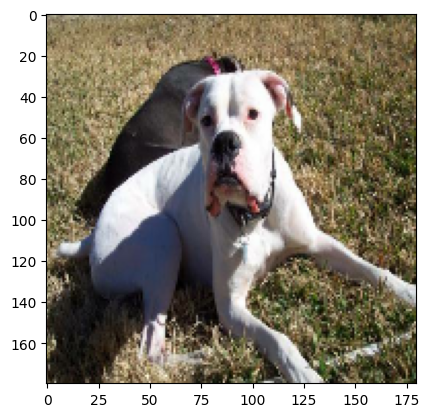

In [7]:
# import imshow
import matplotlib.pyplot as plt

plt.imshow(data_batch[0].numpy().astype("uint8"))

# Training a CNN Model

## Defining the Model
the below code defines a Convolutional Neural Network (CNN) model in TensorFlow/Keras. The model is designed for image classification tasks, where the input images have a size of 180x180 pixels with 3 color channels (RGB).

    - It takes an image of size 180x180x3 as input.
    - Extracts features through multiple convolutional layers and reduces dimensions with max pooling.
    - Outputs a probability between 0 and 1 to classify the image into two classes (e.g., dog or cat).

In [10]:
# Define the input layer with the shape of the images
inputs = keras.Input(shape=(180, 180, 3))

# Rescale the pixel values to the range [0, 1]
x = layers.Rescaling(1./255)(inputs)

# Add the first convolutional layer with 32 filters and a kernel size of 3x3, followed by a ReLU activation function
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)

# Add a max pooling layer with a pool size of 2x2
x = layers.MaxPooling2D(pool_size=2)(x)

# Add the second convolutional layer with 64 filters and a kernel size of 3x3, followed by a ReLU activation function
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)

# Add a max pooling layer with a pool size of 2x2
x = layers.MaxPooling2D(pool_size=2)(x)

# Add the third convolutional layer with 128 filters and a kernel size of 3x3, followed by a ReLU activation function
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)

# Add a max pooling layer with a pool size of 2x2
x = layers.MaxPooling2D(pool_size=2)(x)

# Add the fourth convolutional layer with 256 filters and a kernel size of 3x3, followed by a ReLU activation function
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)

# Add a max pooling layer with a pool size of 2x2
x = layers.MaxPooling2D(pool_size=2)(x)

# Add the fifth convolutional layer with 256 filters and a kernel size of 3x3, followed by a ReLU activation function
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)

# Flatten the output of the convolutional layers to feed into the dense layer
x = layers.Flatten()(x)

# Add a dense layer with a single neuron and a sigmoid activation function for binary classification
outputs = layers.Dense(1, activation="sigmoid")(x)

# Create the model by specifying the inputs and outputs
model = keras.Model(inputs=inputs, outputs=outputs)

### Summary of model

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

Layer Details:

| Layer Type      | Output Shape       | Param # | Explanation                                                                                       |
|-----------------|--------------------|---------|---------------------------------------------------------------------------------------------------|
| InputLayer      | (None, 180, 180, 3)| 0       | Takes input images of size 180x180x3 (RGB). The None means the batch size is variable.            |
| Rescaling       | (None, 180, 180, 3)| 0       | Normalizes pixel values (scaling them to [0, 1]).                                                 |
| Conv2D (1)      | (None, 178, 178, 32)| 896     | Applies 32 filters, each of size 3x3. Output size reduces slightly because of the kernel size (180 - 3 + 1 = 178). |
| MaxPooling2D (1)| (None, 89, 89, 32) | 0       | Reduces the spatial dimensions by half (from 178x178 to 89x89).                                   |
| Conv2D (2)      | (None, 87, 87, 64) | 18,496  | Applies 64 filters of size 3x3. Further reduces the output size (89 - 3 + 1 = 87).                |
| MaxPooling2D (2)| (None, 43, 43, 64) | 0       | Halves the dimensions again (from 87x87 to 43x43).                                                |
| Conv2D (3)      | (None, 41, 41, 128)| 73,856  | Uses 128 filters, output size decreases due to convolution (43 - 3 + 1 = 41).                     |
| MaxPooling2D (3)| (None, 20, 20, 128)| 0       | Halves dimensions (41x41 to 20x20).                                                               |
| Conv2D (4)      | (None, 18, 18, 256)| 295,168 | Applies 256 filters, reducing size (20 - 3 + 1 = 18).                                             |
| MaxPooling2D (4)| (None, 9, 9, 256)  | 0       | Halves dimensions again (18x18 to 9x9).                                                           |
| Conv2D (5)      | (None, 7, 7, 256)  | 590,080 | Another convolution with 256 filters, reducing dimensions slightly.                               |
| Flatten         | (None, 12544)      | 0       | Flattens the 3D feature map (9, 9, 256) into a 1D vector with size 12544 (9x9x256).               |
| Dense           | (None, 1)          | 12,545  | Fully connected layer with 1 neuron. Outputs a probability (for binary classification).           |


> Total params: 991,041

> Trainable params: 991,041

> Non-trainable params: 0

### Compile the Model

This code prepares the model for training by specifying the following:

- **Loss Function**:  
  `binary_crossentropy` is used for binary classification tasks to measure the difference between predicted and true values.

- **Optimizer**:  
  `rmsprop` adjusts the model's weights to minimize the loss during training efficiently.

- **Metrics**:  
  Tracks `accuracy` during training to evaluate how often the model's predictions are correct.

In [12]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

### Train the Model

Callbacks:

A ModelCheckpoint callback saves the model to the specified file (`./models/convnet_from_scratch.keras`) whenever the validation loss (`val_loss`) improves. `save_best_only=True` ensures only the best-performing model is saved.

model.fit:

- **Training Data**: `train_dataset` is used for training the model.
- **Epochs**: The model trains for 30 iterations over the dataset.
- **Validation Data**: `validation_dataset` evaluates the model after each epoch.
- **Callbacks**: Executes the checkpoint logic during training.

In [14]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="./models/convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 63s 994ms/step - loss: 0.6981 - accuracy: 0.4955 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 2/20
63/63 [==============================] - 60s 953ms/step - loss: 0.6982 - accuracy: 0.5330 - val_loss: 0.6890 - val_accuracy: 0.5000
Epoch 3/20
63/63 [==============================] - 57s 910ms/step - loss: 0.6851 - accuracy: 0.5510 - val_loss: 0.6628 - val_accuracy: 0.6050
Epoch 4/20
63/63 [==============================] - 56s 881ms/step - loss: 0.6427 - accuracy: 0.6180 - val_loss: 0.6010 - val_accuracy: 0.6690
Epoch 5/20
63/63 [==============================] - 52s 824ms/step - loss: 0.6172 - accuracy: 0.6550 - val_loss: 0.5940 - val_accuracy: 0.6590
Epoch 6/20
63/63 [==============================] - 54s 854ms/step - loss: 0.5838 - accuracy: 0.6795 - val_loss: 0.7383 - val_accuracy: 0.6070
Epoch 7/20
63/63 [==============================] - 52s 828ms/step - loss: 0.5776 - accuracy: 0.7020 - val_loss: 0.5774 - val_accuracy: 0.6960

### Displaying curves of loss and accuracy during training
visualize the model’s performance over training epochs by plotting accuracy and loss for both training and validation sets.
- Benefits of visualization:
  - Helps to understand how well the model is learning.
  - Detects overfitting or underfitting.
  - Provides insights for improving the model.

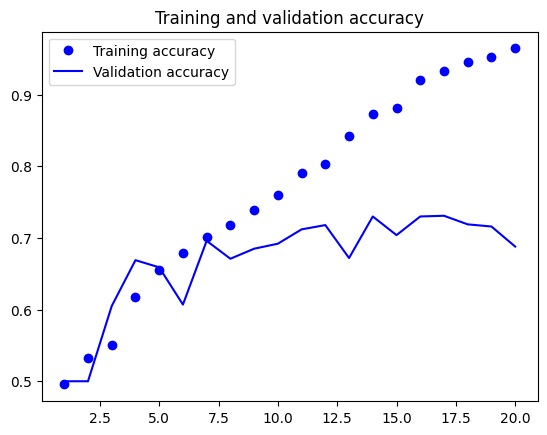

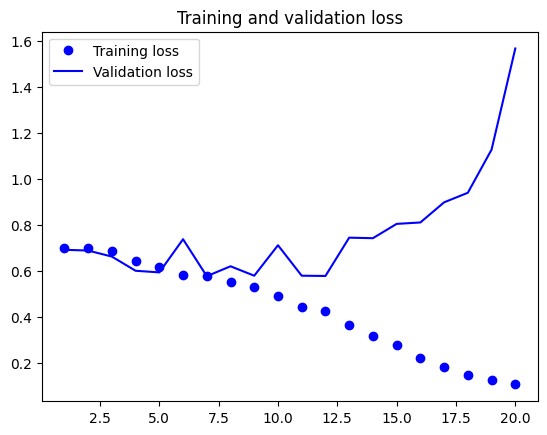

In [15]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

### Evaluating the model on the test dataset:
Evaluating the model on the test set provides a final performance check on unseen data. The model's accuracy and loss on the test set are calculated to understand how well the model generalizes to new data.

In [16]:
test_model = keras.models.load_model("./models/convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 14s 207ms/step - loss: 0.6101 - accuracy: 0.6840
Test accuracy: 0.684


### Using data augmentation
#### Define a data augmentation stage to add to an image model

In [17]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

Here we use the `data_augmentation` model that we defined above, and pass the same image nine times.
Can you identify the three augmenting effects? 

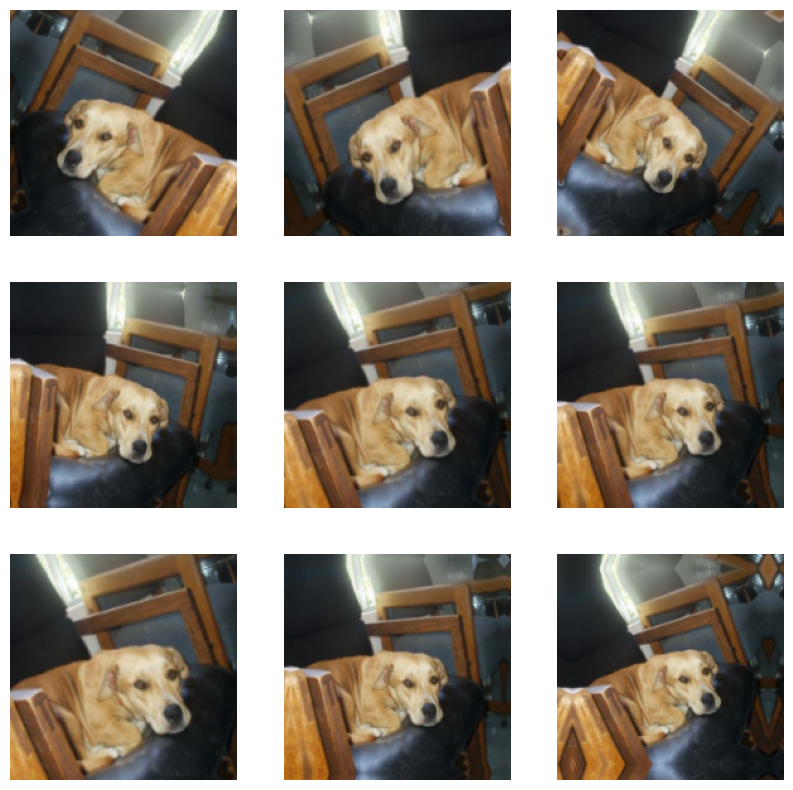

In [18]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

Our new model includes two changes compared to the previous one:
1. data augmentation as the first step
2. a dropout layer just before the last layer for regularization

In [19]:
inputs = keras.Input(shape=(180, 180, 3))
# x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
# x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [20]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

> Total params: 991,041

> Trainable params: 991,041

> Non-trainable params: 0

## Training the regularized model

Now we train the model for 50 epochs, evaluates it after each epoch on the validation dataset, and saves the best version of the model based on validation loss.

In [21]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="./models/convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 74s 1s/step - loss: 0.6951 - accuracy: 0.5255 - val_loss: 0.6875 - val_accuracy: 0.5880
Epoch 2/50
63/63 [==============================] - 57s 908ms/step - loss: 0.6864 - accuracy: 0.5690 - val_loss: 0.6632 - val_accuracy: 0.6100
Epoch 3/50
63/63 [==============================] - 55s 876ms/step - loss: 0.6681 - accuracy: 0.6040 - val_loss: 0.6231 - val_accuracy: 0.6510
Epoch 4/50
63/63 [==============================] - 56s 891ms/step - loss: 0.6385 - accuracy: 0.6425 - val_loss: 0.6139 - val_accuracy: 0.6640
Epoch 5/50
63/63 [==============================] - 57s 904ms/step - loss: 0.6197 - accuracy: 0.6885 - val_loss: 0.6508 - val_accuracy: 0.5990
Epoch 6/50
63/63 [==============================] - 58s 922ms/step - loss: 0.5590 - accuracy: 0.7165 - val_loss: 0.5910 - val_accuracy: 0.7140
Epoch 7/50
63/63 [==============================] - 55s 880ms/step - loss: 0.5573 - accuracy: 0.7295 - val_loss: 0.5597 - val_accuracy: 0.7160
Ep

### Displaying curves of loss and accuracy during training
visualize the model’s performance over training epochs by plotting accuracy and loss for both training and validation sets.

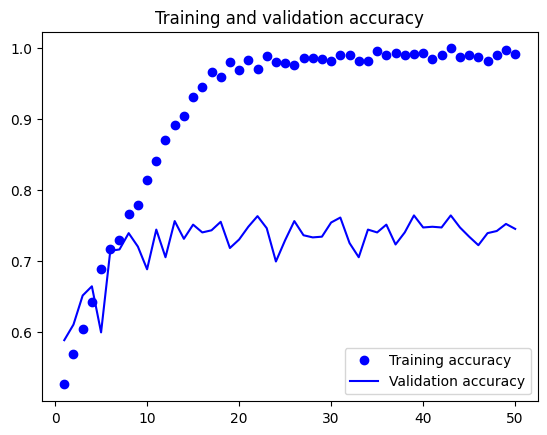

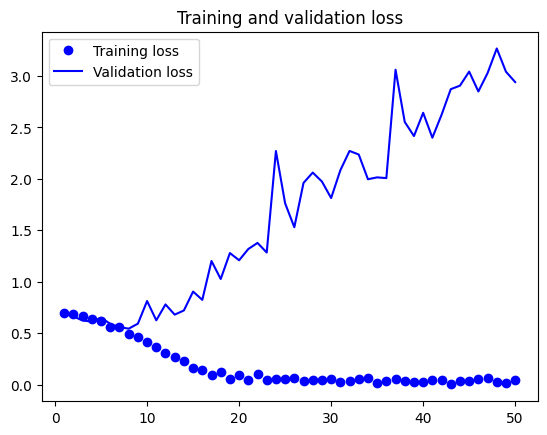

In [22]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [23]:
test_model = keras.models.load_model(
    "./models/convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 15s 240ms/step - loss: 0.5495 - accuracy: 0.7300
Test accuracy: 0.730


### Model Evaluation Summary

- **Test Loss:** 0.5495
- **Test Accuracy:** 0.7300

The model was evaluated on the test dataset, achieving a test accuracy of 73.00%. This indicates that the model correctly classified 73% of the test images. The test loss, which measures the model's prediction error, was 0.5495.

### Fine-tuning the model using VGG16

#### **Instantiating the VGG16 convolutional base**
VGG16 is a pre-trained convolutional neural network (CNN) architecture widely used for image classification. It has 16 layers (13 convolutional, 3 fully connected) with small 3x3 filters, offering high accuracy. Developed by Visual Geometry Group, it's effective for transfer learning and tasks involving visual feature extraction.

In [ ]:
# Load the VGG16 model pre-trained on ImageNet, excluding the top classification layer
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",  # Use weights pre-trained on ImageNet
    include_top=False,   # Exclude the top fully connected layers
    input_shape=(180, 180, 3)  # Define the input shape to match our dataset
)

In [25]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

| Layer (Type)          | Output Shape        | Parameters | Description                                                |
|-----------------------|---------------------|------------|------------------------------------------------------------|
| Input Layer           | (None, 180, 180, 3) | 0          | Accepts input images of size 180x180 with 3 channels (RGB).|
| Block1_Conv1 (Conv2D) | (None, 180, 180, 64)| 1,792      | Extracts features using 64 filters.                        |
| Block1_Conv2 (Conv2D) | (None, 180, 180, 64)| 36,928     | Further feature extraction with 64 filters.                |
| Block1_Pool (MaxPooling) | (None, 90, 90, 64) | 0          | Downsamples spatial dimensions to 90x90.                   |
| Block2_Conv1 (Conv2D) | (None, 90, 90, 128) | 73,856     | Extracts features using 128 filters.                       |
| Block2_Conv2 (Conv2D) | (None, 90, 90, 128) | 147,584    | Further feature extraction with 128 filters.               |
| Block2_Pool (MaxPooling) | (None, 45, 45, 128) | 0          | Downsamples spatial dimensions to 45x45.                   |
| Block3_Conv1 (Conv2D) | (None, 45, 45, 256) | 295,168    | Extracts features using 256 filters.                       |
| Block3_Conv2 (Conv2D) | (None, 45, 45, 256) | 590,080    | Further feature extraction with 256 filters.               |
| Block3_Conv3 (Conv2D) | (None, 45, 45, 256) | 590,080    | Further feature extraction with 256 filters.               |
| Block3_Pool (MaxPooling) | (None, 22, 22, 256) | 0          | Downsamples spatial dimensions to 22x22.                   |
| Total Parameters      |                     | 14,714,688 | Total trainable weights in the model.                      |




> Total params: 14,714,688

> Trainable params: 14,714,688

> Non-trainable params: 0

### Extracting the VGG16 features and corresponding labels

In [26]:
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 2s 2s/step


In [ ]:
train_features.shape

In [10]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(180, 180, 3))
# Freeze base model layers
base_model.trainable = False

# Add custom classification layers
x = base_model.output
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model = keras.Model(inputs=base_model.input, outputs=outputs)

63/63 [==============================] - 329s 5s/step
              precision    recall  f1-score   support

           0       0.51      0.25      0.34      1000
           1       0.50      0.76      0.60      1000

    accuracy                           0.50      2000
   macro avg       0.51      0.50      0.47      2000
weighted avg       0.51      0.50      0.47      2000



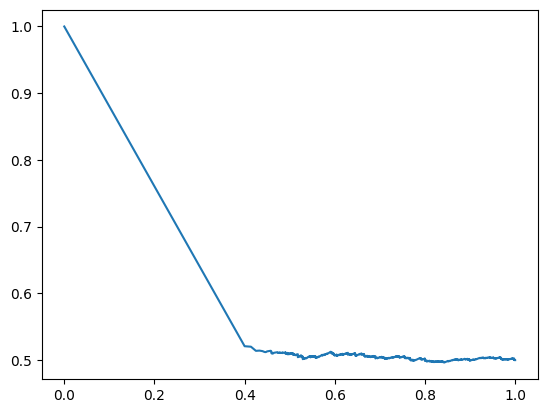

In [11]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
import numpy as np

# Predict on test dataset
y_pred = model.predict(test_dataset)
y_true = np.concatenate([y for x, y in test_dataset], axis=0)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred > 0.5)

# Classification Report
print(classification_report(y_true, y_pred > 0.5))

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_true, y_pred)
plt.plot(recall, precision)

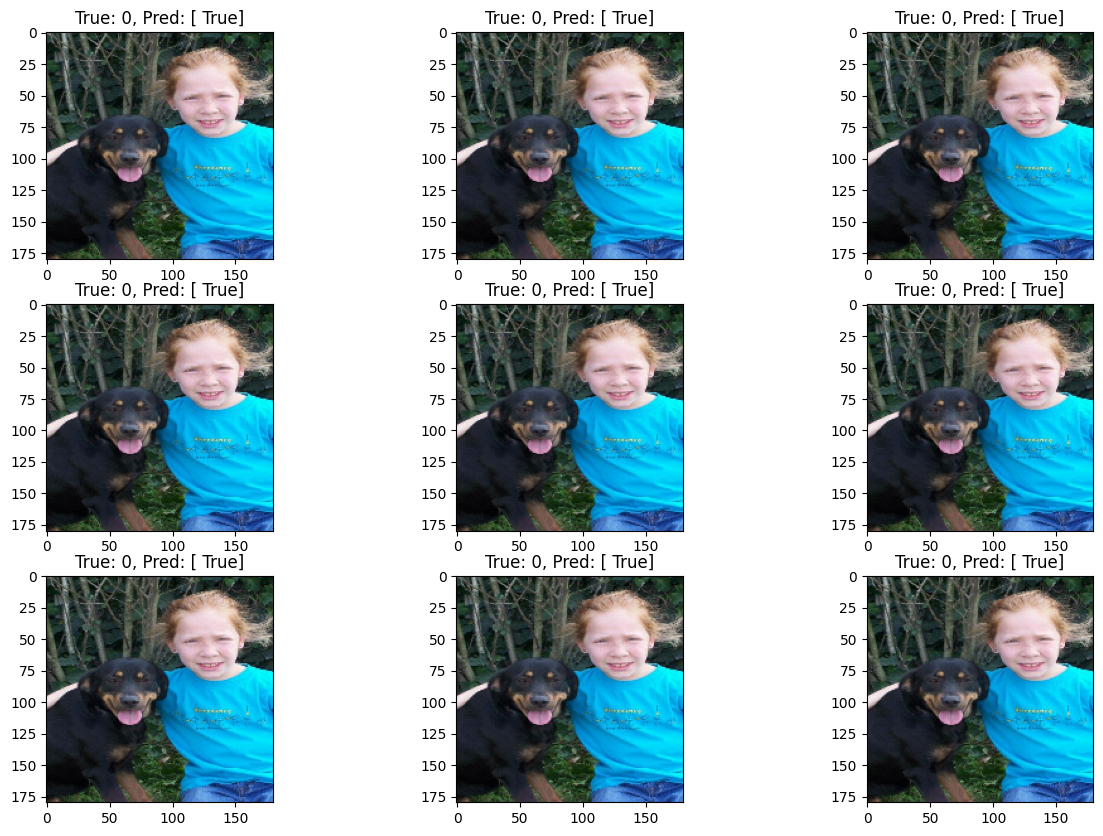

In [13]:
# Identify misclassified images
misclassified_indices = np.where(y_true != (y_pred > 0.5))[0]
plt.figure(figsize=(15, 10))

# Iterate over the dataset to get images and labels
test_images = []
for images, labels in test_dataset:
    test_images.extend(images.numpy())

for i, idx in enumerate(misclassified_indices[:9]):
    plt.subplot(3, 3, i+1)
    plt.imshow(test_images[idx].astype("uint8"))
    plt.title(f"True: {y_true[idx]}, Pred: {y_pred[idx] > 0.5}")

In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0
